# Assignment 1

## 1. Importing Dependencies

In [881]:
import pandas as pd
import numpy as np
import re

from matplotlib.pyplot import figure
import plotly as py

from datetime import date

from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans

import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Data set

In [882]:
df = pd.read_csv('master.csv')

In [883]:
#setting display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 3. EDA and Data Wrangling

### 3.1 Understanding The Data

In [884]:
df.shape

(1109, 18)

We have 162 rows and 18 columns

In [885]:
#Checking the first 5 rows of the Dataframe
df.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                               Title        Price  \
0  2017 Ford Escape SE SE 4WD Heated Seats Backup...  $20,898.00    
1  2021 Jeep Wrangler | Unlimited Sahara | Clean ...  $54,887.00    
2  2020 Toyota Corolla LE | Heated Seats | Back-u...  $26,498.00    
3  2018 Volkswagen Atlas Highline 3.6L with 8sp 4...  $42,999.00    
4  2018 Mercedes-Benz E-Class E400 4MATIC, NAV, 3...  $57,800.00    

                                    Location  \
0           Markham / York Region 18/10/2022   
1       Mississauga / Peel Region 18/10/2022   
2  Provincial Top Ad:  Guelph < 16 hours ago   
3       Mississauga / Peel Region 14/10/2022   
4                 City of Toronto 15/10/2022   

                                         Description Condition    year  \
0  Clean Carfax SE 4WD Heated Seats Backup Camera...      Used  2017.0   
1  | Unlimited Sahara | Clean Carfax | Navigation...      Used  2021.0   
2  *Heated Seats, Blind Spot Detection, Lane Keep...      Used  2020.0   
3  2018 Atlas Highline 4Motion finished in Deep B...      Used  2018.0   
4  2018 MERCEDES BENZ E400 4MATIC COUPE | AWD | 3...      Used  2018.0   

            Make     Model                                               Trim  \
0           Ford    Escape                                                 SE   
1           Jeep  Wrangler   | Unlimited Sahara | Clean Carfax | Navigation |   
2         Toyota   Corolla                 LE | Heated Seats | Back-up Camera   
3     Volkswagen     Atlas                     Highline 3.6L with 8sp 4MOTION   
4  Mercedes-Benz   E-Class  E400 4MATIC, NAV, 360 CAM, BURMESTER, HEATED S...   

    Color       Body Type Number of Doors Number of Seats  \
0   White  SUV, Crossover               4               5   
1  Silver     Convertible               4               5   
2   White           Sedan               4               5   
3   Black  SUV, Crossover               4               6   
4   White  Coupe (2 door)               2               4   

               Drive Train Transmission  Mileage  
0                    4 x 4    Automatic  132,380  
1                    4 x 4    Automatic   28,000  
2  Front-wheel drive (FWD)    Automatic   75,661  
3    All-wheel drive (AWD)    Automatic   60,169  
4    All-wheel drive (AWD)    Automatic   59,349

In [886]:
#Checking the last 5 rows of the Dataframe
df.tail()

Unnamed: 0  Unnamed: 0.1  \
1104        1104           117   
1105        1105           118   
1106        1106           119   
1107        1107           120   
1108        1108           121   

                                                  Title         Price  \
1104                     2010 Chevrolet Aveo 5dr Wgn LT     $3,500.00   
1105  2014 Jeep Cherokee 4WD 4dr North | Accident-Fr...     $9,999.00   
1106                                           Ram 2500  Swap / Trade   
1107  2013 Porsche Boxster S | PDK | Premium Package...    $67,995.00   
1108                                2020 Nissan Qashqai    $29,650.00   

                                               Location  \
1104                             Georgina < 2 hours ago   
1105                             Georgina < 2 hours ago   
1106                           Burlington < 2 hours ago   
1107                Oakville / Halton Region 11/11/2022   
1108  Provincial Top Ad:  Windsor Region < 10 hours ago   

                                            Description Condition    year  \
1104  Checkout Our Website! www.LevelUpMotors.ca Ple...      Used  2010.0   
1105  Checkout Our Website! www.LevelUpMotors.ca Ple...      Used  2014.0   
1106  2018 Ram 2500 Clean Carproof, 2 owners, 69,000...      Used  2018.0   
1107  ONE OWNER | NO ACCIDENT | ONTARIO VEHICLE | CA...      Used  2013.0   
1108  Stop in for a test drive today! No games. Just...      Used  2020.0   

           Make     Model                                       Trim  Color  \
1104  Chevrolet      Aveo                                         LT  White   
1105       Jeep  Cherokee                                      North    NaN   
1106        Ram      2500                                        NaN  Black   
1107    Porsche   Boxster  S | PDK | Premium Package | BOSE Surround   Blue   
1108     Nissan   Qashqai                                          S    Red   

           Body Type Number of Doors Number of Seats              Drive Train  \
1104       Hatchback             4.0             5.0  Front-wheel drive (FWD)   
1105  SUV, Crossover             4.0             5.0                    4 x 4   
1106    Pickup Truck             4.0             5.0                    4 x 4   
1107     Convertible             2.0             2.0   Rear-wheel drive (RWD)   
1108  SUV, Crossover             4.0             5.0    All-wheel drive (AWD)   

     Transmission  Mileage  
1104    Automatic  201,500  
1105    Automatic  250,700  
1106    Automatic   72,000  
1107    Automatic   59,138  
1108    Automatic   12,119

In [887]:
#Checking the Data types
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Title               object
Price               object
Location            object
Description         object
Condition           object
year               float64
Make                object
Model               object
Trim                object
Color               object
Body Type           object
Number of Doors     object
Number of Seats     object
Drive Train         object
Transmission        object
Mileage             object
dtype: object

Note: 

We have,

1 Integer Column

3 float Columns 

13 Object Columns

Todo : Convert Price, Mileage to float or Integer values

Also we need to Drop the Unnamed: 0 column which is a replica of Automatic Index column

In [888]:
#Dropping the Unnamed: 0 
df.drop('Unnamed: 0',axis = 1,inplace=True)
df.drop('Unnamed: 0.1',axis = 1,inplace=True)

In [889]:
# Getting first price if two were given
df['Price'] = df['Price'].map(lambda x: x.split('\n',1)[0])

In [890]:
#  Converting Price column to required string format
df['Price'] = df['Price'].map(lambda x: re.sub(r'[^\d.]', '',x))
#Converting Price column to required string format
df['Price'] = df['Price'].map(lambda x: float(x) if not x == '' else np.nan)

In [891]:
#  Converting Number of Doors column to required string format
df['Number of Doors'] = df['Number of Doors'].map(lambda x: re.sub(r'[^\d.]', '',str(x)))
#Converting Price column to required string format
df['Number of Doors'] = df['Number of Doors'].map(lambda x: float(x) if not x == '' else np.nan)

In [892]:
#  Converting Number of Seats column to required string format
df['Number of Seats'] = df['Number of Seats'].map(lambda x: re.sub(r'[^\d.]', '',str(x)))
#Converting Price column to required string format
df['Number of Seats'] = df['Number of Seats'].map(lambda x: float(x) if not x == '' else np.nan)

In [893]:
#Converting Mileage column to required string format
df['Mileage'] = df['Mileage'].apply(lambda x: float(re.sub(r'[^\d.]', '',str(x))) if not pd.isnull(x) else np.nan)

In [894]:
df.dtypes

Title               object
Price              float64
Location            object
Description         object
Condition           object
year               float64
Make                object
Model               object
Trim                object
Color               object
Body Type           object
Number of Doors    float64
Number of Seats    float64
Drive Train         object
Transmission        object
Mileage            float64
dtype: object

### 3.2 Summary Statistics

In [895]:
df.describe()

Price         year  Number of Doors  Number of Seats  \
count    1066.000000  1100.000000       809.000000       751.000000   
mean    35490.605394  2015.559091         3.803461         5.071904   
std     36159.658948     5.973795         0.708637         1.155922   
min        89.000000  1963.000000         2.000000         1.000000   
25%     13575.000000  2012.000000         4.000000         5.000000   
50%     27992.500000  2017.000000         4.000000         5.000000   
75%     49993.000000  2020.000000         4.000000         5.000000   
max    499800.000000  2023.000000         5.000000         8.000000   

             Mileage  
count    1006.000000  
mean   118519.478131  
std     82543.007382  
min         6.000000  
25%     54708.000000  
50%    107474.000000  
75%    173900.500000  
max    441440.000000

### 3.3 Unique Values

In this section we will be intuitively selecting categorical features to continue data Analysis and encoding

In [896]:
#Checking unique values of categorical columns
df.select_dtypes(include=['object']).nunique()

Title           589
Location        344
Description     600
Condition         2
Make             37
Model           222
Trim            403
Color            16
Body Type         9
Drive Train       5
Transmission      4
dtype: int64

Since columns 'Title' , 'Location', 'Description', 'Make', 'Model','Trim' has considerably high number of unique values, encoding these columns would result in a higher dimention of the dataset hence we have decided to exclude these columns for proceedings

In [897]:
#Dropping 
cols = ['Title' , 'Location', 'Description', 'Make', 'Model','Trim']
df.drop(columns=cols,inplace=True)

### 3.4 Checking for Missing Values and Imputation

Common methods to Deal with Missing values for categorical Features: 

1. Imputing with most common class 

2. Using a classification model to predict the class

3. Having clustering to find which class

But in this notebook we will be considering option 01 and option 02

In [898]:
#Checking for null value percentage with respect to total entries
round(df.isnull().mean()*100,0)

Price               4.0
Condition           1.0
year                1.0
Color               8.0
Body Type           1.0
Number of Doors    27.0
Number of Seats    32.0
Drive Train         9.0
Transmission        9.0
Mileage             9.0
dtype: float64

To Do : Number of Doors and Number of Seats have significant percentages of null values hence we will drop these columns for the initial model. Other columns have less than 10% hence we will impute with mean value of the respective columns

<AxesSubplot:title={'center':'Null Value Percentages'}>

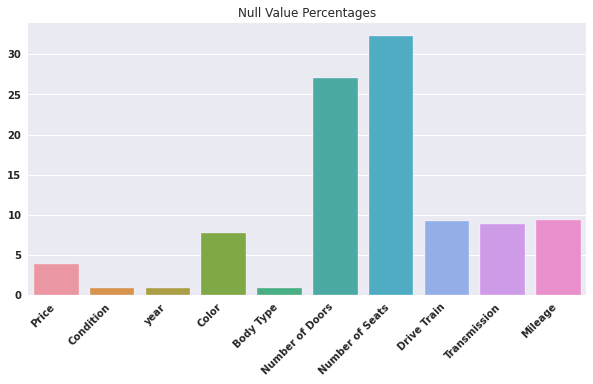

In [899]:
x = df.isnull().mean()*100

plt.rcParams["figure.figsize"] = (10,5)

plt.xticks(rotation=45, ha='right')
plt.title("Null Value Percentages")
sns.set_style("darkgrid")
sns.barplot(x = df.columns , y=x)

In [900]:
# # Dropping 'Number of Doors' and 'Number of Seats'
# df.drop(columns=['Number of Doors','Number of Seats'],inplace=True)

In [901]:
df.dtypes

Price              float64
Condition           object
year               float64
Color               object
Body Type           object
Number of Doors    float64
Number of Seats    float64
Drive Train         object
Transmission        object
Mileage            float64
dtype: object

##### 3.4.1 Dealing With Missing Values for Numerical Features

Using KNNImputer by Scikit Learn

In [902]:
from sklearn.impute import KNNImputer

In [903]:
imputer = KNNImputer(n_neighbors=3)

In [904]:
df['Price'] = imputer.fit_transform(df[['Price']])
df['year'] = imputer.fit_transform(df[['year']])
df['Mileage'] = imputer.fit_transform(df[['Mileage']])
df['Number of Doors'] = imputer.fit_transform(df[['Number of Doors']])
df['Number of Seats'] = imputer.fit_transform(df[['Number of Seats']])

##### 3.4.1 Dealing With Missing Values for Categorical Features

In [905]:
#Replacing NaN values with Mode for categorical Columns
df['Condition'].fillna(df['Condition'].value_counts().index[0], inplace=True)
df['Color'].fillna(df['Color'].value_counts().index[0], inplace=True)
df['Body Type'].fillna(df['Body Type'].value_counts().index[0], inplace=True)
df['Drive Train'].fillna(df['Drive Train'].value_counts().index[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].value_counts().index[0], inplace=True)

In [906]:
round(df.isnull().mean()*100,0)

Price              0.0
Condition          0.0
year               0.0
Color              0.0
Body Type          0.0
Number of Doors    0.0
Number of Seats    0.0
Drive Train        0.0
Transmission       0.0
Mileage            0.0
dtype: float64

In [907]:
#df_clean = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.value_counts().index[0]))

### 3.5 Feature Engineering

Inorder to get an intuitive meaning out of the column 'Year' , we can find out how old the vehicle is by 
substracting the model year from current year. This new feature will be added as 'Age'

In [908]:
current_year = date.today().year
df['Age'] = current_year - df['year']

## 4. Plotting

In [909]:
df.dtypes

Price              float64
Condition           object
year               float64
Color               object
Body Type           object
Number of Doors    float64
Number of Seats    float64
Drive Train         object
Transmission        object
Mileage            float64
Age                float64
dtype: object

In [910]:
sns.set_style('darkgrid')

### 4.1 Numerical Columns

#### 4.1.1 Histogram

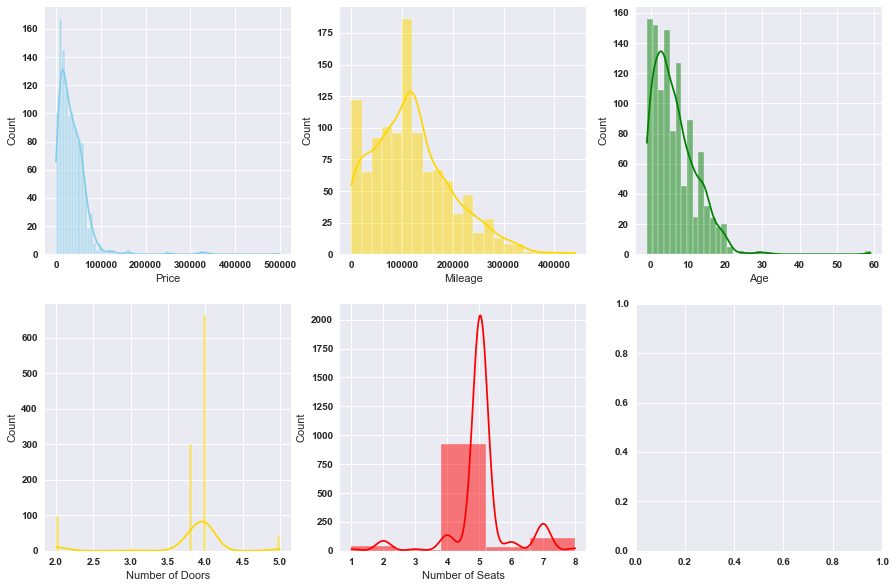

In [911]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data=df, x="Price", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="Mileage", kde=True, color="gold", ax=axs[0,1])
sns.histplot(data=df, x="Age", kde=True, color="Green", ax=axs[0,2])
sns.histplot(data=df, x="Number of Doors", kde=True, color="gold", ax=axs[1,0])
sns.histplot(data=df['Number of Seats'], kde=True, color="red", ax=axs[1,1],bins=5)

plt.show()

Observations:

1. Mileage has a right skewed distribution

2. Price has a uniform distribution

3. Age has a right skewed distribution

Todo:
Log transform 'Price' column for skewness reduction.

Status : Done

##### 4.1.2 Correlogram

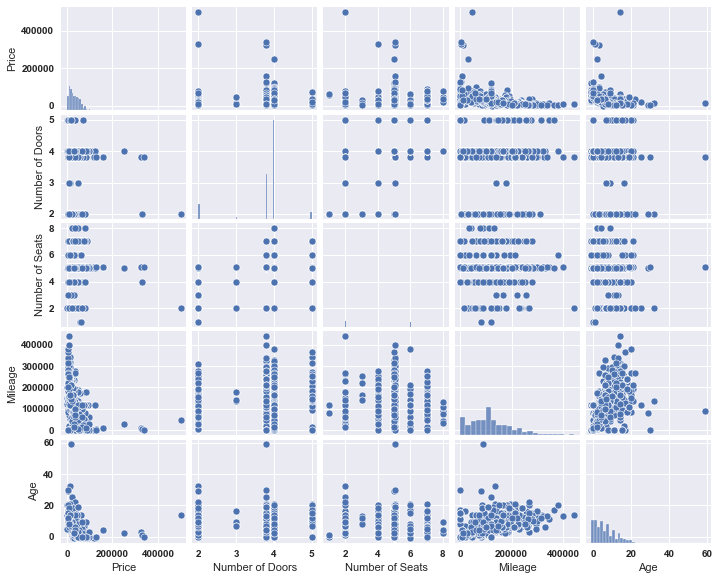

In [912]:
# Pair Plot
g = sns.pairplot(df.drop(columns='year'))
g.fig.set_size_inches(10,8)

Observations:

There seems to be no correlation between mileage and price where even through price increases majority of Mileage 
values remain to be same.
However, the Mileage and Age seems to have a positive correlation.

##### 4.1.3 Heatmap

<AxesSubplot:>

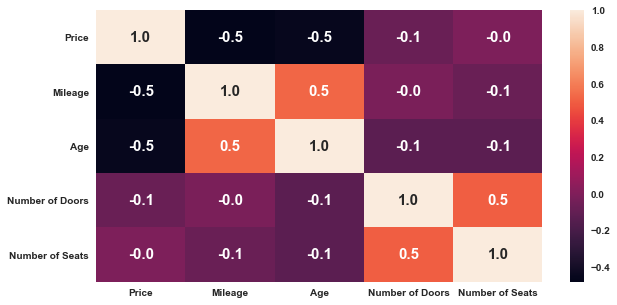

In [913]:
corr = df[['Price','Mileage','Age','Number of Doors','Number of Seats']].corr()
sns.heatmap(corr, annot=True, fmt=".1f")

### 4.2 Categorical Columns

<AxesSubplot:xlabel='Transmission', ylabel='count'>

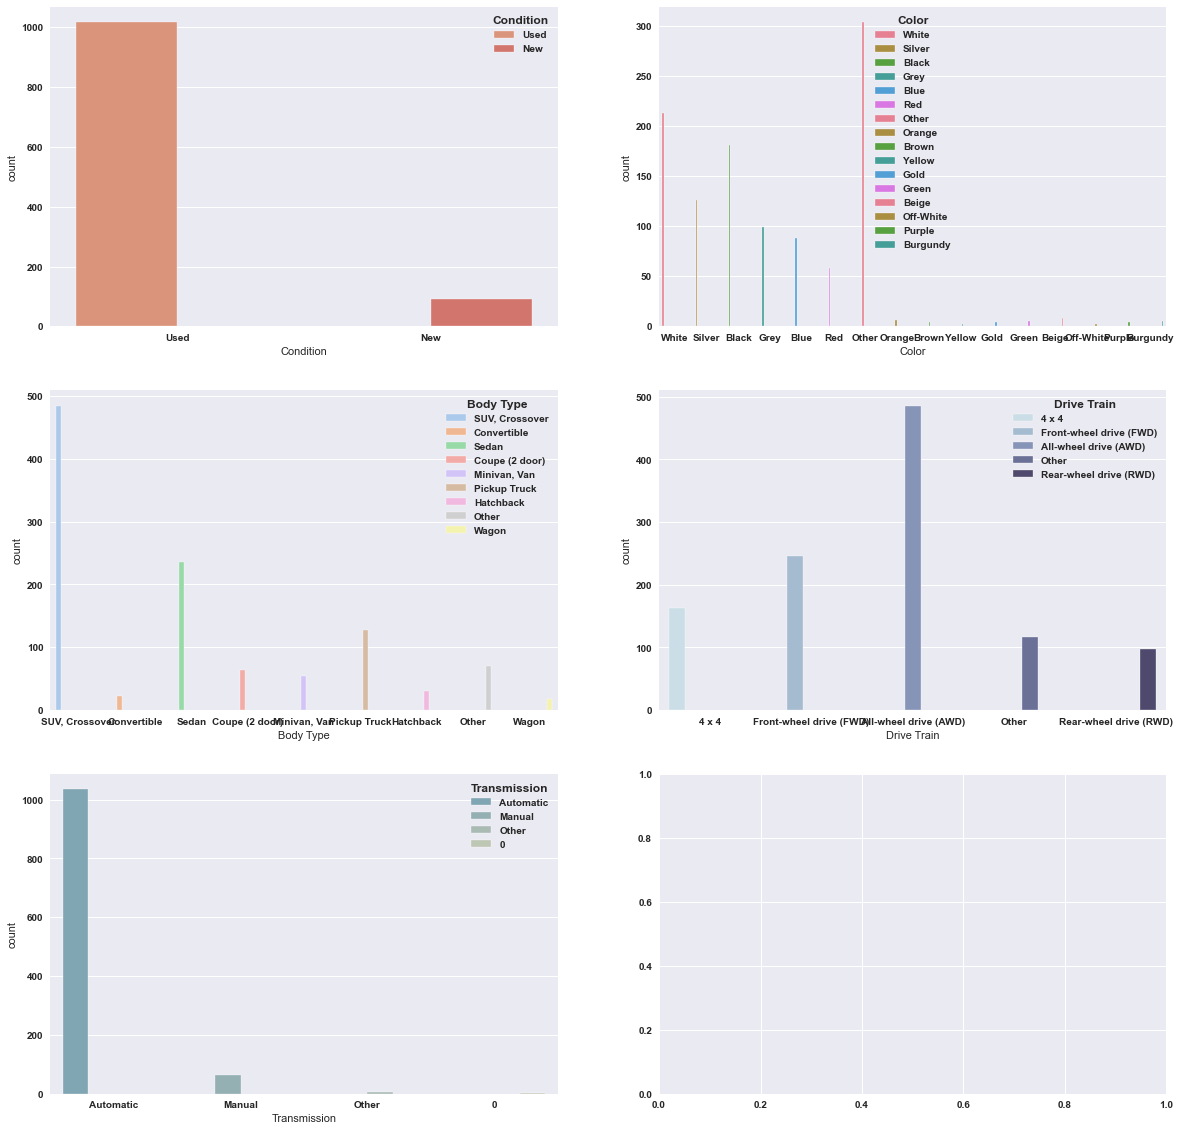

In [914]:
#Countplots
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.countplot(x=df['Condition'], ax=axs[0,0],palette=sns.color_palette("flare"),hue=df['Condition'])
sns.countplot(x=df['Color'], ax=axs[0,1],palette=sns.color_palette("husl"),hue=df['Color'])
sns.countplot(x=df['Body Type'], ax=axs[1,0],palette=sns.color_palette("pastel"),hue=df['Body Type'])
sns.countplot(x=df['Drive Train'], ax=axs[1,1],palette=sns.color_palette("ch:s=.25,rot=-.25"),hue=df['Drive Train'])
sns.countplot(x=df['Transmission'],ax=axs[2,0],palette=sns.color_palette("blend:#7AB,#EDA"),hue=df['Transmission'])

Observations: 

1. 'Condition' seems to be containing more values of 'Used' category compared to 'New'. 
2. 'Transmission' seems to be containing more values of 'Automatic' category compared to 'Manual'


## 5. Pandas Profiling

In [794]:
from pandas_profiling import ProfileReport

In [795]:
#Creating pandas profile
profile = ProfileReport(df, title="Pandas Profiling Report")

In [796]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [797]:
#Exporting Created Profile to HTML format
profile.to_file("Pandas_Profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Outlier Detection and Removal

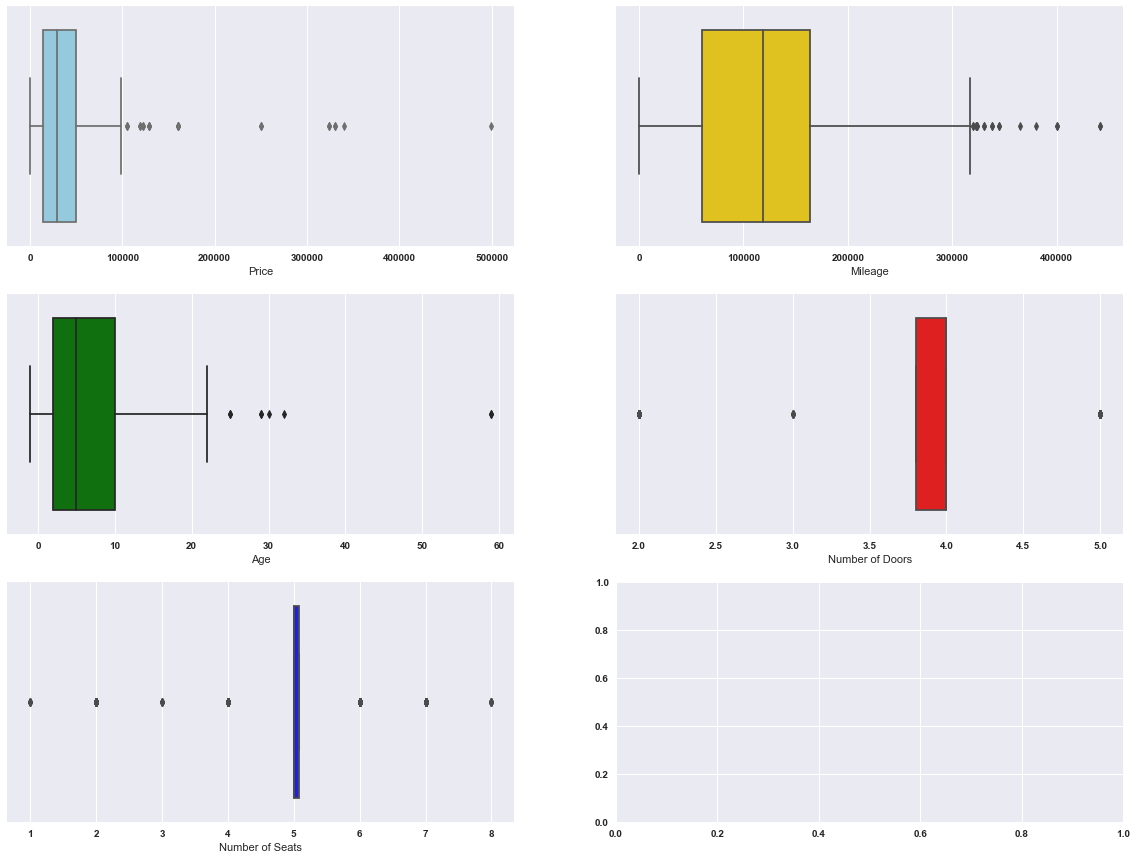

In [915]:
#Boxplots
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

sns.boxplot(data=df, x="Price",  color="skyblue", ax=axs[0,0])
sns.boxplot(data=df, x="Mileage", color="gold", ax=axs[0,1])
sns.boxplot(data=df, x="Age", color="Green", ax=axs[1,0])
sns.boxplot(data=df, x="Number of Doors", color="Red", ax=axs[1,1])
sns.boxplot(data=df, x="Number of Seats", color="Blue", ax=axs[2,0])

plt.show()

Observations:

1. 'Price', 'Age', 'Mileage', ' Number of Doors' seems to have ourliers (data points out of whiskers) 


### 6.1 Log Transforming

For the skewed values, we will perform log transformation to remove the skewness

Skweness:  5.315498994371264


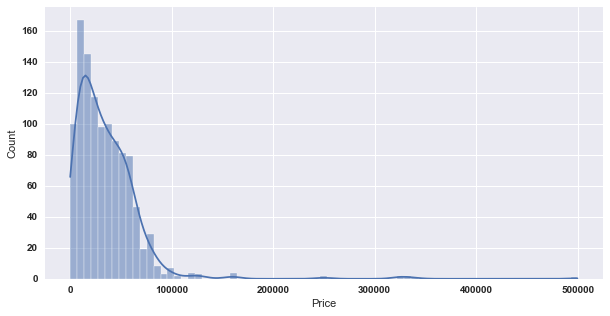

In [916]:
#Before Log Transformation
sns.histplot(data=df['Price'],kde=True)
print('Skweness: ', df['Price'].skew())

In [917]:
#Log Tranforming and Creating New Column for transformed Data
df['Price_logarithm'] = df['Price'].map(lambda x: np.log2(x) if x!= 0 else 0)
df['Mileage_logarithm'] = df['Mileage'].map(lambda x: np.log2(x) if x!= 0 else 0)
df['Age_logarithm'] = df['Age'].map(lambda x: np.log2(x) if x!= 0 else 0)

<ipython-input-917-df7efe4e58e8>:4: RuntimeWarning:

invalid value encountered in log2



Skweness:  -0.6118518590237912


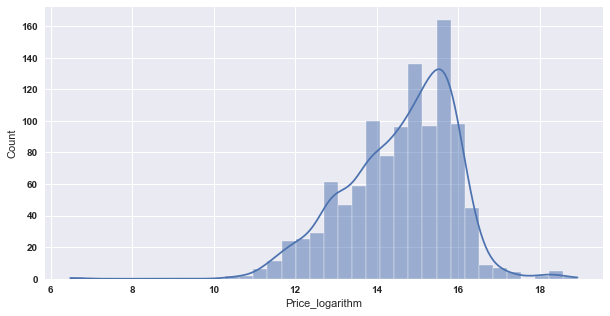

In [918]:
sns.histplot(data=df['Price_logarithm'],kde=True)
print('Skweness: ', df['Price_logarithm'].skew())

<AxesSubplot:xlabel='Age_logarithm', ylabel='Count'>

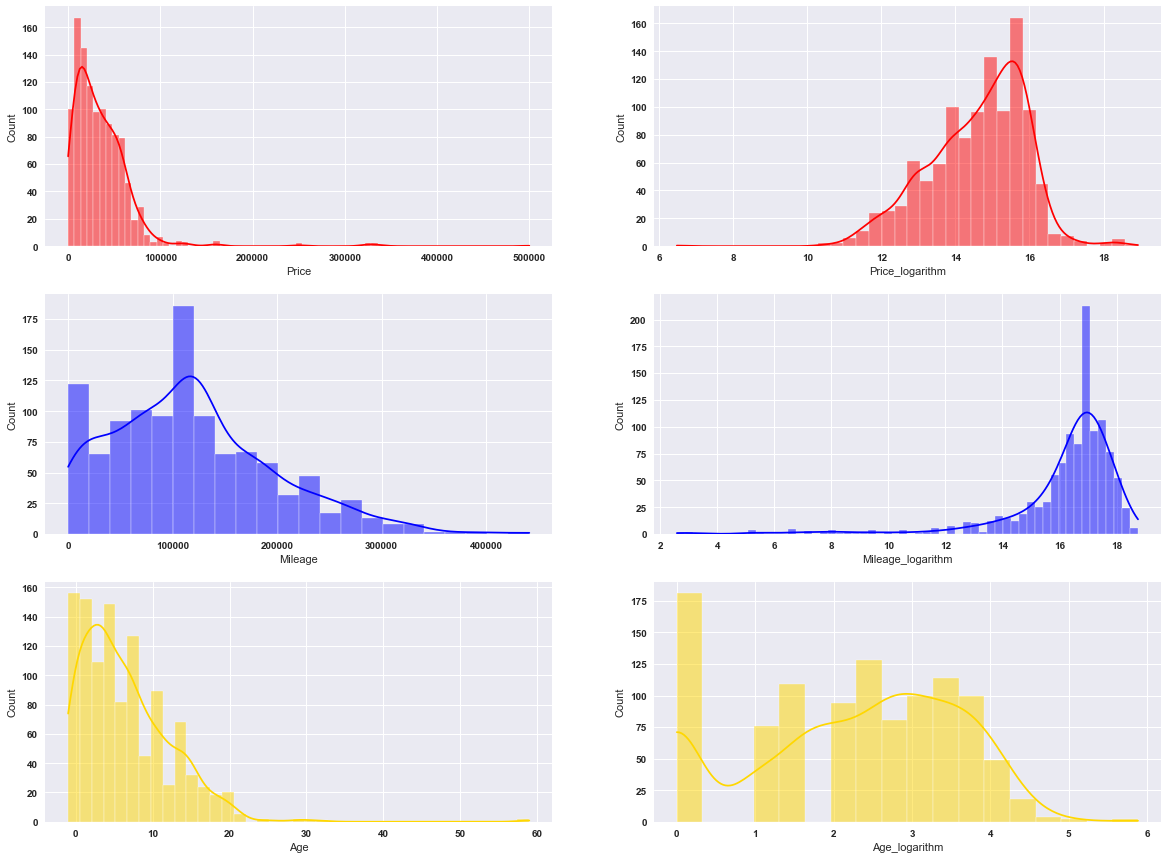

In [919]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.histplot(data=df['Price'],kde=True,ax=axs[0,0],color='red')
sns.histplot(data=df['Price_logarithm'],kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df['Mileage'],kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=df['Mileage_logarithm'],kde=True,ax=axs[1,1],color='blue')
sns.histplot(data=df['Age'],kde=True,ax=axs[2,0],color='gold')
sns.histplot(data=df['Age_logarithm'],kde=True,ax=axs[2,1],color='gold')

### 6.2 Trimming

In [920]:
#Finding the upperbound to Trim Price
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1

upper_wisker_price = q3+(1.5*iqr)

print('Price')
print('Shape before Trimming: ',df.shape)

index = df[(df['Price'])>upper_wisker_price].index
print('Shape After Trimming: ',df.drop(index=index).shape)

Price
Shape before Trimming:  (1109, 14)
Shape After Trimming:  (1088, 14)


In [921]:
#Finding the upperbound to Trim Age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

upper_wisker_age = q3+(1.5*iqr)

print('Age')
print('Shape before Trimming: ',df.shape)

index = df[(df['Age'])>upper_wisker_age].index
print('Shape After Trimming: ',df.drop(index=index).shape)

Age
Shape before Trimming:  (1109, 14)
Shape After Trimming:  (1101, 14)


In [922]:
#Finding the upperbound to Trim Mileage
q1 = df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)
iqr = q3-q1

upper_wisker_age = q3+(1.5*iqr)

print('Mileage')
print('Shape before Trimming: ',df.shape)

index = df[(df['Mileage'])>upper_wisker_age].index
print('Shape After Trimming: ',df.drop(index=index).shape)

Mileage
Shape before Trimming:  (1109, 14)
Shape After Trimming:  (1091, 14)


### 6.3 Quantile based flooring and capping

##### 6.3.1 'Price'

In [923]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1

lower_wisker = q1-(1.5*iqr)
upper_wisker = q3+(1.5*iqr)

In [924]:
print(f"Q1: {q1:,}")
print(f"Q3: {q3:,}")
print(f"IQR: {iqr:,}")
print(f"Lower Wisker: {lower_wisker:,}")
print(f"upper Wisker: {upper_wisker:,}")

Q1: 13,880.0
Q3: 49,489.0
IQR: 35,609.0
Lower Wisker: -39,533.5
upper Wisker: 102,902.5


Note : Since there are no outliers behind the lower wisker, we will only be considering the upper wisker

In [925]:
df['Price'] = np.where(df['Price']>upper_wisker,upper_wisker,df['Price'])

<AxesSubplot:xlabel='Price'>

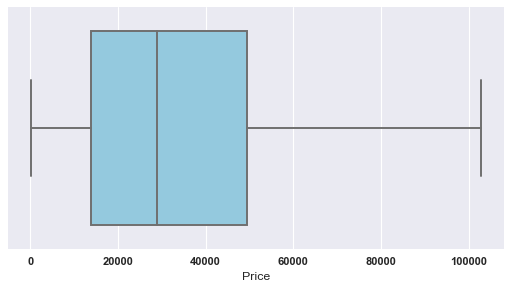

In [926]:
figure(figsize=(8, 4), dpi=80)
sns.boxplot(data=df, x="Price",color="skyblue")

##### 6.3.2 'Age'

In [927]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

lower_wisker = q1-(1.5*iqr)
upper_wisker = q3+(1.5*iqr)

In [928]:
print(f"Q1: {q1:,}")
print(f"Q3: {q3:,}")
print(f"IQR: {iqr:,}")
print(f"Lower Wisker: {lower_wisker:,}")
print(f"upper Wisker: {upper_wisker:,}")

Q1: 2.0
Q3: 10.0
IQR: 8.0
Lower Wisker: -10.0
upper Wisker: 22.0


Since there are no outliers behind the lower wisker, we will only be considering the upper wisker

In [929]:
df['Age'] = np.where(df['Age']>upper_wisker,upper_wisker,df['Age'])

<AxesSubplot:xlabel='Age'>

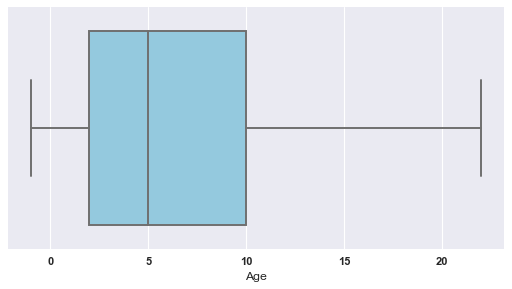

In [930]:
figure(figsize=(8, 4), dpi=80)
sns.boxplot(data=df, x="Age",color="skyblue")

In [931]:
q1 = df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)
iqr = q3-q1

lower_wisker = q1-(1.5*iqr)
upper_wisker = q3+(1.5*iqr)

In [932]:
print(f"Q1: {q1:,}")
print(f"Q3: {q3:,}")
print(f"IQR: {iqr:,}")
print(f"Lower Wisker: {lower_wisker:,}")
print(f"upper Wisker: {upper_wisker:,}")

Q1: 60,002.0
Q3: 164,000.0
IQR: 103,998.0
Lower Wisker: -95,995.0
upper Wisker: 319,997.0


In [933]:
df['Mileage'] = np.where(df['Mileage']>upper_wisker,upper_wisker,df['Mileage'])

<AxesSubplot:xlabel='Mileage'>

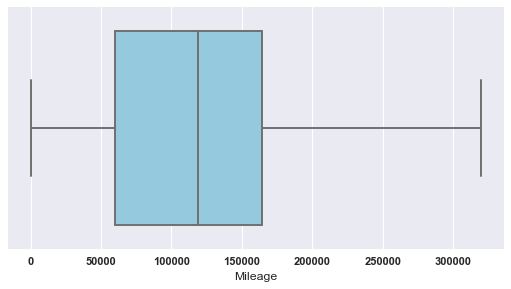

In [934]:
figure(figsize=(8, 4), dpi=80)
sns.boxplot(data=df, x="Mileage",color="skyblue")

## 7. Encoding

In [935]:
df.dtypes

Price                float64
Condition             object
year                 float64
Color                 object
Body Type             object
Number of Doors      float64
Number of Seats      float64
Drive Train           object
Transmission          object
Mileage              float64
Age                  float64
Price_logarithm      float64
Mileage_logarithm    float64
Age_logarithm        float64
dtype: object

In [936]:
#Categorical Data
df.select_dtypes(include=['object']).nunique()

Condition        2
Color           16
Body Type        9
Drive Train      5
Transmission     4
dtype: int64

##### 7.1 Binary Encoding

In [938]:
# Binary Encoding for 'Condition' as it has only 2 unique instances
df['Condition'] = df['Condition'].map(lambda x:0 if x=='Used' else 1)
df.groupby('Condition')['Price'].nunique()

Condition
1    438
Name: Price, dtype: int64

In [939]:
# Binary Encoding for 'Transmission' as it has only 2 major unique instances
df.groupby('Transmission')['Price'].nunique()

Transmission
0              1
Automatic    416
Manual        32
Other          4
Name: Price, dtype: int64

In [940]:
df = df[(df['Transmission'] != 'Other')]
df = df[(df['Transmission'] != '0')]

In [941]:
# df['Transmission'] = df['Transmission'].map({0: 'Automatic', 'Other': 'Manual'})

In [942]:
df.groupby('Transmission')['Price'].nunique()
df['Transmission'] = df['Transmission'].map(lambda x:0 if x=='Automatic' else 1)
df.groupby('Condition')['Price'].nunique()

Condition
1    437
Name: Price, dtype: int64

##### 7.2 Onehot Encoding

In [943]:
# 2. Onehot Encoding for other categorical Columns

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoding the 'Color' Column
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Color']]).toarray())
encoder_df.columns = df['Color'].unique()
joined_df = df.join(encoder_df)
joined_df.head()

Price  Condition    year   Color       Body Type  Number of Doors  \
0  20898.0          1  2017.0   White  SUV, Crossover              4.0   
1  54887.0          1  2021.0  Silver     Convertible              4.0   
2  26498.0          1  2020.0   White           Sedan              4.0   
3  42999.0          1  2018.0   Black  SUV, Crossover              4.0   
4  57800.0          1  2018.0   White  Coupe (2 door)              2.0   

   Number of Seats              Drive Train  Transmission   Mileage  Age  \
0              5.0                    4 x 4             0  132380.0  5.0   
1              5.0                    4 x 4             0   28000.0  1.0   
2              5.0  Front-wheel drive (FWD)             0   75661.0  2.0   
3              6.0    All-wheel drive (AWD)             0   60169.0  4.0   
4              4.0    All-wheel drive (AWD)             0   59349.0  4.0   

   Price_logarithm  Mileage_logarithm  Age_logarithm  White  Silver  Black  \
0        14.351077          17.014326       2.321928    0.0     0.0    0.0   
1        15.744177          14.773139       0.000000    0.0     0.0    0.0   
2        14.693596          16.207262       1.000000    0.0     0.0    0.0   
3        15.392015          15.876733       2.000000    0.0     1.0    0.0   
4        15.818782          15.856936       2.000000    0.0     0.0    0.0   

   Grey  Blue  Red  Other  Brown  Orange  Yellow  Gold  Green  Beige  \
0   0.0   0.0  0.0    0.0    0.0     0.0     0.0   0.0    0.0    0.0   
1   0.0   0.0  0.0    0.0    0.0     0.0     0.0   0.0    0.0    0.0   
2   0.0   0.0  0.0    0.0    0.0     0.0     0.0   0.0    0.0    0.0   
3   0.0   0.0  0.0    0.0    0.0     0.0     0.0   0.0    0.0    0.0   
4   0.0   0.0  0.0    0.0    0.0     0.0     0.0   0.0    0.0    0.0   

   Off-White  Purple  Burgundy  
0        0.0     1.0       0.0  
1        1.0     0.0       0.0  
2        0.0     1.0       0.0  
3        0.0     0.0       0.0  
4        0.0     1.0       0.0

In [944]:
# Encoding the 'Drive Train' Column
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Drive Train']]).toarray())
encoder_df.columns = df['Drive Train'].unique()
joined_df = df.join(encoder_df)
joined_df.head()

Price  Condition    year   Color       Body Type  Number of Doors  \
0  20898.0          1  2017.0   White  SUV, Crossover              4.0   
1  54887.0          1  2021.0  Silver     Convertible              4.0   
2  26498.0          1  2020.0   White           Sedan              4.0   
3  42999.0          1  2018.0   Black  SUV, Crossover              4.0   
4  57800.0          1  2018.0   White  Coupe (2 door)              2.0   

   Number of Seats              Drive Train  Transmission   Mileage  Age  \
0              5.0                    4 x 4             0  132380.0  5.0   
1              5.0                    4 x 4             0   28000.0  1.0   
2              5.0  Front-wheel drive (FWD)             0   75661.0  2.0   
3              6.0    All-wheel drive (AWD)             0   60169.0  4.0   
4              4.0    All-wheel drive (AWD)             0   59349.0  4.0   

   Price_logarithm  Mileage_logarithm  Age_logarithm  4 x 4  \
0        14.351077          17.014326       2.321928    1.0   
1        15.744177          14.773139       0.000000    1.0   
2        14.693596          16.207262       1.000000    0.0   
3        15.392015          15.876733       2.000000    0.0   
4        15.818782          15.856936       2.000000    0.0   

   Front-wheel drive (FWD)  All-wheel drive (AWD)  Other  \
0                      0.0                    0.0    0.0   
1                      0.0                    0.0    0.0   
2                      0.0                    1.0    0.0   
3                      1.0                    0.0    0.0   
4                      1.0                    0.0    0.0   

   Rear-wheel drive (RWD)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

Note : Similarly this can be performed for rest of the categorical columns, but since we will not be using it for 
clustering, we will not proceed for other columns

## 8. Normalize

We have selected to check the relationship between Price,Age and Mileage and as each of these features have distinct value ranges, it is necessary to normalze and rescale the values to fit a common range for better performance of machine learning model.

In [945]:
scaler = MinMaxScaler()

df['Price'] = scaler.fit_transform(df[['Price']])

df['Age'] = scaler.fit_transform(df[['Age']])

df['Mileage'] = scaler.fit_transform(df[['Mileage']])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

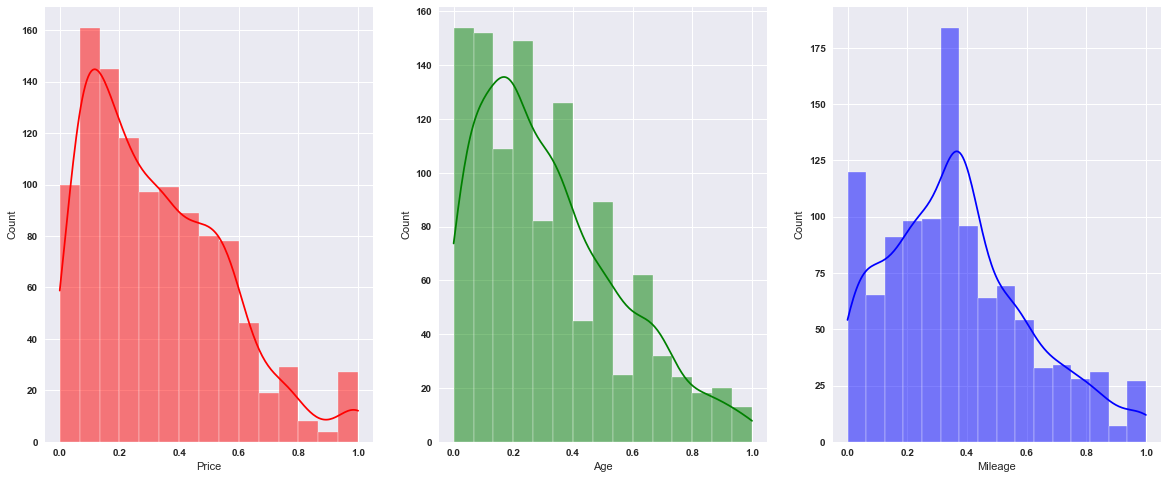

In [946]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
sns.histplot(data=df['Price'],kde=True,ax=axs[0],color='red')
sns.histplot(data=df['Age'],kde=True,ax=axs[1],color='green')
sns.histplot(data=df['Mileage'],kde=True,ax=axs[2],color='blue')

## 9. KMeans Clustering

### 9.1 Calculating Inertia:

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [829]:
df.isnull().mean()

Price                0.000000
Condition            0.000000
year                 0.000000
Color                0.000000
Body Type            0.000000
Number of Doors      0.000000
Number of Seats      0.000000
Drive Train          0.000000
Transmission         0.000000
Mileage              0.000000
Age                  0.000000
Price_logarithm      0.000000
Mileage_logarithm    0.000000
Age_logarithm        0.046364
dtype: float64

In [830]:
'''Price Log and Age '''
X1 = df[['Price_logarithm' , 'Age']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### 9.2 Finding best number of Clusters

For this, we will be using the elbow method used which the point where the inertia starts to show low degree of
reduction, is considerd the best number of clusters

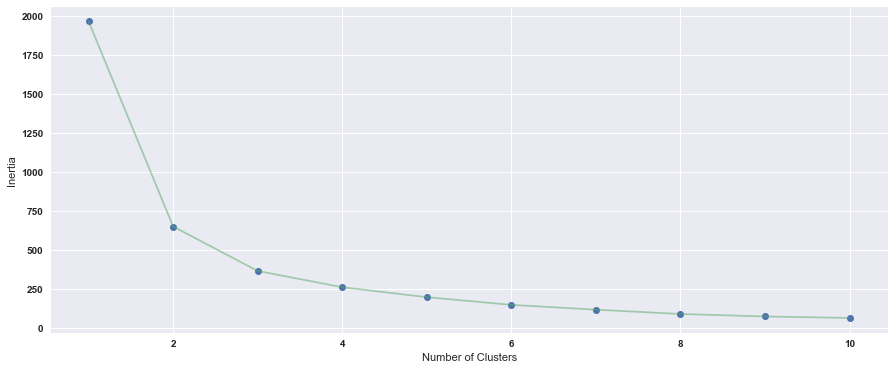

In [831]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.style.use("seaborn")
plt.show()

### 9.3 Fitting the K means Model

Text(0, 0.5, 'Age')

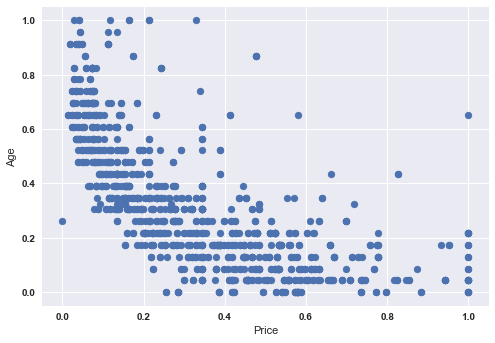

In [832]:
#Try to see whether we can see clusters with scatter plot
plt.scatter(df['Price'],df['Age'])
plt.xlabel("Price")
plt.ylabel("Age")

Note : It is not easy to spot clusters in this manner hence we will use K means 

In [833]:
# Setting 4 as the number of clusters
km = KMeans(n_clusters=4)

In [834]:
# Splitting the data for training and testing
trainingRows = int(df.shape[0]*0.75)

trainingSet = df[['Price','Age','Mileage']].iloc[:trainingRows,:]
testingSet = df[['Price','Age','Mileage']].iloc[trainingRows:,:]

In [835]:
km.fit(trainingSet)

KMeans(n_clusters=4)

In [836]:
y_predicted = km.fit_predict(testingSet)
y_predicted

array([0, 2, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 1, 3, 0, 0, 1, 3, 0, 1, 2,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       3, 0, 0, 2, 3, 3, 2, 3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 1, 1, 0, 0, 3, 3, 1, 1, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 2, 1, 2, 0, 0, 0, 0, 3, 3, 0, 3, 3, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 3, 0, 3, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 3, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2,
       0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 0, 3, 3, 2, 3, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3], dtype=int32)

In [837]:
#Including the clusters as a column
testingSet['Cluster'] = y_predicted

Text(0, 0.5, 'Age')

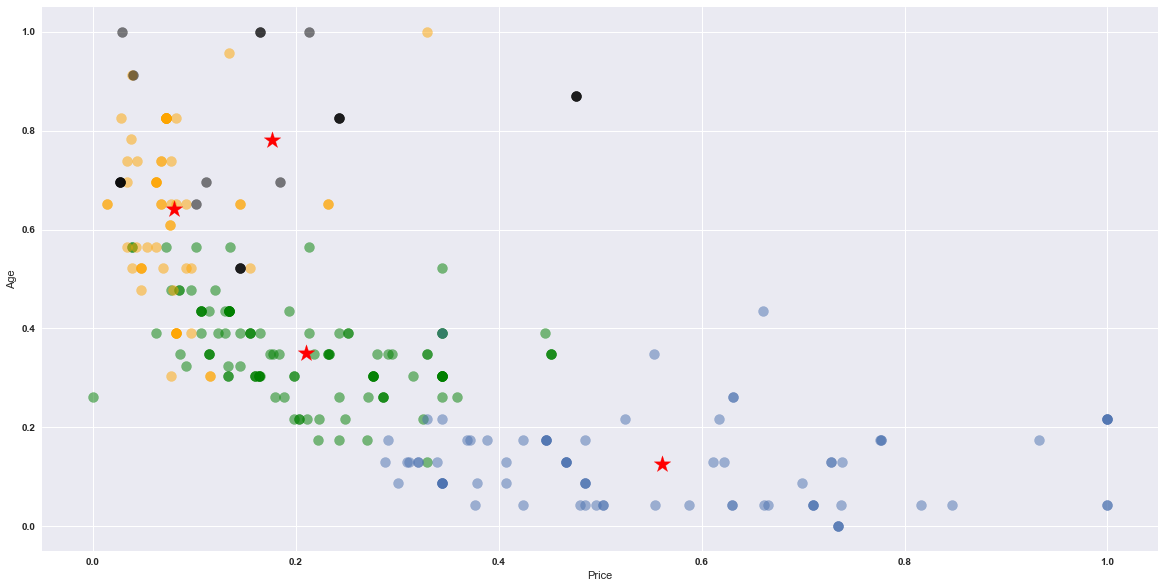

In [838]:
df1 = testingSet[testingSet.Cluster==0]
df2 = testingSet[testingSet.Cluster==1]
df3 = testingSet[testingSet.Cluster==2]
df4 = testingSet[testingSet.Cluster==3]

plt.figure(figsize=(20, 10))
plt.style.use("seaborn")
plt.scatter(x = 'Price' , y = 'Age' ,data = df1,color = 'green',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df2,color = 'orange',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df3,color = 'black',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df4,s=100,alpha = 0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker="*",s=300)
plt.xlabel("Price")
plt.ylabel("Age")

### 9.4 Plotting 3D for 3 parameters

In [839]:
X3 = testingSet[['Price' , 'Age' ,'Mileage']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [840]:
testingSet['labels'] =  labels3
trace1 = go.Scatter3d(
    x= testingSet['Price'],
    y= testingSet['Age'],
    z= testingSet['Mileage'],
    mode='markers',
     marker=dict(
        color = testingSet['labels'], 
        size= 20,
        line=dict(
            color= testingSet['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Price'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'Mileage')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
py.offline.iplot(fig)

## 10. MeanShift Clustering

In [841]:
from sklearn.cluster import MeanShift

In [842]:
ms = MeanShift()
dfDB = trainingSet[['Price','Age','Mileage']]
ms.fit(dfDB)
cluster_centers = ms.cluster_centers_
cluster_centers

array([[0.42219247, 0.15970041, 0.23847974],
       [1.        , 0.65217391, 0.14832605]])

In [843]:
dfDB

Price       Age   Mileage
0    0.202396  0.260870  0.413680
1    0.532984  0.086957  0.087484
2    0.256863  0.130435  0.236429
3    0.417358  0.217391  0.188015
4    0.561317  0.217391  0.185452
5    0.232810  0.260870  0.399052
6    0.571044  0.130435  0.108428
7    0.373404  0.173913  0.253404
8    0.378413  0.130435  0.276152
9    0.434466  0.217391  0.230141
10   0.222743  0.217391  0.333922
11   0.514534  0.173913  0.083293
12   0.874457  0.086957  0.192605
13   0.421209  0.086957  0.064671
14   0.219660  0.304348  0.349079
15   0.601176  0.043478  0.370365
16   0.247156  0.217391  0.209256
17   0.485403  0.130435  0.225519
18   0.110987  0.913043  0.520227
19   0.201929  0.217391  0.485957
20   0.183497  0.173913  0.371489
21   0.580770  0.652174  0.222781
22   0.230621  0.260870  0.518615
23   0.280109  0.173913  0.270876
24   0.239181  0.217391  0.503767
25   0.212025  0.434783  0.453119
26   0.242099  0.173913  0.258173
27   0.103887  0.391304  0.650000
28   0.445457  0.130435  0.118869
29   0.319618  0.217391  0.242304
30   0.504885  0.043478  0.370365
31   0.384152  0.173913  0.178755
32   0.484576  0.173913  0.205084
33   0.338681  0.739130  0.385948
34   0.776367  0.217391  0.128685
35   0.611019  0.260870  0.092481
36   0.250930  0.347826  0.828130
37   0.387313  0.217391  0.196502
38   0.344328  0.304348  0.256438
39   0.217967  0.304348  0.430931
40   0.038030  0.565217  0.497802
41   0.203290  0.173913  0.077618
42   0.424925  0.217391  0.437494
43   0.213104  0.434783  0.648437
44   0.339508  0.173913  0.419090
45   0.634946  0.043478  0.370365
46   0.057473  0.652174  0.362491
47   0.474636  0.173913  0.259364
48   0.329772  0.173913  0.125554
49   0.106124  0.391304  0.656250
50   0.620531  0.086957  0.240613
51   0.689657  0.043478  0.000113
52   0.317935  0.304348  0.734377
53   0.260773  0.217391  0.305121
54   0.057444  0.739130  0.582707
55   0.582667  0.043478  0.001463
56   0.513542  0.043478  0.370365
57   0.388140  0.173913  0.243738
58   0.152801  0.323518  0.370365
59   0.110987  0.913043  0.520227
60   0.266609  0.323518  0.370365
61   0.453423  0.130435  0.238632
62   0.189771  0.521739  0.463069
63   0.619675  0.217391  0.144992
64   0.416395  0.304348  0.291368
65   0.162537  0.478261  0.382861
66   0.242283  0.347826  0.526840
67   0.344328  0.130435  0.081568
68   0.698556  0.260870  0.110500
69   0.344328  0.347826  0.353116
70   0.120694  0.521739  0.553122
72   0.072082  0.695652  0.560935
73   0.300632  0.304348  0.401883
74   0.182816  0.347826  0.546872
75   1.000000  0.173913  0.036070
76   0.475677  0.086957  0.022013
77   0.388140  0.173913  0.574997
78   0.076828  0.695652  0.607498
79   0.261629  0.347826  0.422052
80   1.000000  0.043478  0.009532
81   0.498952  0.130435  0.147154
82   0.154639  0.347826  0.373545
83   0.163393  0.347826  0.587657
84   0.174199  0.217391  0.490620
85   0.076945  0.521739  0.556247
86   0.344328  0.173913  0.506871
87   0.182816  0.434783  0.334366
88   0.776367  0.130435  0.044933
89   0.426218  0.086957  0.057158
90   0.417221  0.130435  0.109322
91   0.640198  0.347826  0.171549
92   0.328955  0.217391  0.353769
93   0.153667  0.323518  0.370365
94   0.455183  0.043478  0.248066
95   0.344328  0.608696  0.432468
96   0.242283  0.347826  0.526840
97   0.344328  0.130435  0.081568
98   0.698556  0.260870  0.110500
99   0.241418  0.521739  0.252970
100  0.344328  0.347826  0.353116
101  0.120694  0.521739  0.553122
103  0.072082  0.695652  0.560935
104  0.300632  0.304348  0.401883
105  0.130343  0.608696  0.515621
106  0.238976  0.217391  0.299868
107  0.271462  0.173913  0.343741
108  0.310329  0.217391  0.225928
109  0.571044  0.347826  0.167302
110  0.777213  0.130435  0.132616
111  0.251971  0.304348  0.135723
112  0.446498  0.086957  0.049620
113  0.042903  0.782609  0.001075
114  0.144913  0.434783  0.164708
115  1.000000  0.652174  0.148326
116  0.455183  0.043478  0.248066
117  0.344328  0.608696  0.432468
118  0.242283  0.347826  0.526

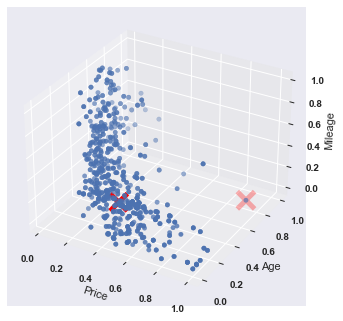

In [844]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfDB.iloc[:,0], dfDB.iloc[:,1], dfDB.iloc[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], 
 cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5,
                                   zorder=10)

ax.set_xlabel('Price')
ax.set_ylabel('Age')
ax.set_zlabel('Mileage')
plt.show()

[[0.42219247 0.15970041 0.23847974]
 [1.         0.65217391 0.14832605]]
Estimated clusters: 2


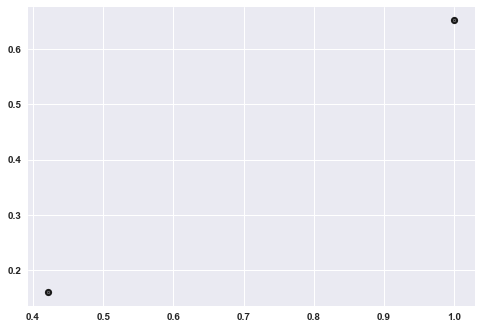

In [845]:
labels = ms.labels_
luster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
# for i in range(len(dfDB)):
#     plt.plot(dfDB[i][0], dfDB[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

## 10. DBSCAN Clustering

In [846]:
from sklearn.cluster import DBSCAN

In [847]:
dfDB = trainingSet[['Price','Age','Mileage']]

In [848]:
dfDB.shape

(825, 3)

In [849]:
dbscan = DBSCAN(eps = 1, min_samples = 2).fit(dfDB.values) # fitting the model
labels = dbscan.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 9.Additions (Text data pre processing)

In [850]:
df = pd.read_csv('out2.csv')

In [851]:
df

Unnamed: 0                                              Title  \
0             0  2017 Ford Escape SE SE 4WD Heated Seats Backup...   
1             1  2021 Jeep Wrangler | Unlimited Sahara | Clean ...   
2             2  2020 Toyota Corolla LE | Heated Seats | Back-u...   
3             3  2018 Volkswagen Atlas Highline 3.6L with 8sp 4...   
4             4  2018 Mercedes-Benz E-Class E400 4MATIC, NAV, 3...   
5             5                                 2017 Nissan Murano   
6             6  2020 Land Rover Range Rover Evoque First Editi...   
7             7  2019 Honda Passport EX-L *** Excellent conditi...   
8             8                              2020 Toyota Sienna LE   
9             9  2018 Ram 1500 | Longhorn | Clean Carfax | One ...   
10           10  2018 Subaru Forester 2.5L TOURING PKG AUT0 AWD...   
11           11                            2019 Audi TT 45 Quattro   
12           12                             2021 GMC SIERRA 2500HD   
13           13          2021 Nissan Maxima SL | Leather | Sunroof   
14           14  2016 Nissan Murano SV AWD SAFETY FEATURES, BAC...   
15           15                             2022 Ram 1500 BIG HORN   
16           16  2018 Subaru Outback TOURING W/TECH PKG AUT0 AW...   
17           17       2020 Chevrolet Express Cargo Van WT - 4G LTE   
18           18  Mercedes Benz Convertible CLK-430-2002 Soft To...   
19           19  2018 Subaru Forester 2.5L CONVENIENCE PKG AUT0...   
20           20  2019 Chevrolet Cruze LT ONE OWNER | NO ACCIDEN...   
21           21  2008 Porsche 911 Carrera Cabriolet, 320HP, MAN...   
22           22                        2017 Hyundai Santa Fe Sport   
23           23                    2019 Volkswagen Golf SportWagen   
24           24                           2018 Lincoln MKC Reserve   
25           25  2013 Ford Econoline E-250 - Power Options - Sh...   
26           26  2019 Volkswagen Golf SportWagen AWD | LOW KM |...   
27           27                2014 Toyota Matrix 4dr Wgn Auto FWD   
28           28             2020 GMC Terrain Denali AWD 4dr Denali   
29           29  2018 BMW 430i xDrive Gran Coupe M PACKAGE | GR...   
30           30  2022 RAM 1500 Classic Express 4x4 Crew Cab 5'7...   
31           31  2019 Subaru Outback 3.6R Premier w-EyeSight Pk...   
32           32  2019 Mercedes-Benz GLA 45 AMG I PANO I NAVI I ...   
33           33  2006 Porsche Cayman S I 6-SPEED I BOSE I COMIN...   
34           34  2018 BMW M4 RED LEATHER I CARBON FIBRE I COMIN...   
35           35  2017 Chevrolet Corvette STINGRAY I 6-SPEED I C...   
36           36  2015 GMC Savana G3500 - 16Ft Box - V8 Gasoline...   
37           37  2018 BMW 5 Series 530i xDrive I M-SPORT I HUD ...   
38           38                                    2016 Subaru BRZ   
39           39  2016 Mercedes-Benz CLA-Class CLA 250 AWD Navig...   
40           40                             2010 Nissan Sentra 2.0   
41           41  2019 Mitsubishi Mirage GT COME EXPERIENCE THE ...   
42           42  2018 Ram Promaster 2500 159WB HighRoof - V6Gas...   
43           43         2013 Ford F-350 XLT Crew Cab Short Box 4WD   
44           44                               2019 Honda Ridgeline   
45           45         2022 Ford F-150 XLT 4WD SUPERCREW 5.5' BOX   
46           46              2008 Chevrolet Uplander 4dr Reg WB LS   
47           47  2019 Ram Promaster 2500 159WB High Roof - V6 G...   
48           48  2019 Volkswagen Golf GTI Autobahn Auto Sunroof...   
49           49  2014 Mazda CX-5 GS/ AWD / SUNROOF / PUSH START...   
50           50  2021 Ram Promaster 2500 159WB High Roof - V6 G...   
51           51  2022 Tesla Model 3 Standard Range RWD No Accid...   
52           52  2016 Ford Transit T-250 148WB Mid Roof - 3.7L ...   
53           53  2018 GMC Terrain SLE Diesel - Navigation - Sun...   
54           54                              2006 Nissan MURANO SL   
55           55   2022 Toyota RAV4 Hybrid SE | Toyota Safety Sense   
56           56

In [852]:
df1 = df[['year','Description']]
df1

year                                        Description
0    2017.0  Clean Carfax SE 4WD Heated Seats Backup Camera...
1    2021.0  | Unlimited Sahara | Clean Carfax | Navigation...
2    2020.0  *Heated Seats, Blind Spot Detection, Lane Keep...
3    2018.0  2018 Atlas Highline 4Motion finished in Deep B...
4    2018.0  2018 MERCEDES BENZ E400 4MATIC COUPE | AWD | 3...
5    2017.0  Check out this 2017 Nissan Murano while we sti...
6    2020.0  CLEAN CARFAX | P250 FIRST EDITION (R-DYNAMIC S...
7    2019.0  Drive this home for only $168.57/wk*** today!!...
8    2020.0  *Family First at Audi Windsor: Move your loved...
9    2018.0  | Longhorn | Clean Carfax | One Owner | Leathe...
10   2018.0  SUV....., AWD.........AUTO...........A/C.........
11   2019.0  CLEAN CARFAX TT 45 QUATTRO AWD 2.0L Turbo 4-Cy...
12   2021.0  THIS 2021 GMC SIERRA 2500 DENALI HAS - REMOTE ...
13   2021.0  This is a great vehicle for anyone and great f...
14   2016.0  2016 Nissan Murano SV AWD CVT with Xtronic 3.5...
15   2022.0  Sunroof, Big Horn Level 2 Equipment, Uconnect!...
16   2018.0  SUV....., AWD.........AUTO...........A/C.........
17   2020.0  4G LTE, Easy Clean Floors, Rear Vision Camera,...
18   2002.0  2002-CLK-430 w/8 Cyl.4.3 engine in good condit...
19   2018.0  SUV....., AWD.........AUTO...........A/C.........
20   2019.0  New Price! 2019 Chevrolet Cruze LT Turbo LT TU...
21   2008.0  2008 PORSCHE 911 CARRERA CABRIOLET | 3.6L 6-CY...
22   2017.0  Engine: 4 Cylinder Engine 2.4L L/100Km City: 1...
23   2019.0  Recent Arrival! White 2019 Volkswagen Golf Spo...
24   2018.0  The 2018 Lincoln MKC Reserve AWD is powered by...
25   2013.0  Just Arrived - Chrome Package - 2013 Ford Econ...
26   2019.0  This Vehicle Has 82,619 KMs, Single Owner, Loc...
27   2014.0  CLEAN CARFAX NO ACCIDENT HISTORY Engine: 1.8 L...
28   2020.0  One owner accident free in excellent condition...
29   2018.0  CANADIAN VEHICLE FROM ONTARIO CARFAX REPORT AV...
30   2022.0  This RAM 1500 Classic has a strong Regular Unl...
31   2019.0  One owner with low mileage and no accident Fea...
32   2019.0  Navigation, GPS, Navi, Bluetooth, Panoramic Su...
33   2006.0  Leather Interior, Heated Seats, Xenon Headlamp...
34   2018.0  Navigation, GPS, Navi, Bluetooth, Back-Up Came...
35   2017.0  See Dealer Website for Details.\nWINNER OF 201...
36   2015.0  Toronto's Largest Selection of CERTIFIED Pre-O...
37   2018.0  Navigation, GPS, Navi, Bluetooth, Sunroof / Mo...
38   2016.0  See Dealer Website for Details. Additional Opt...
39   2016.0  ***FREE 2 YR POWERTRAIN WARRANTY WITH EVERY VE...
40   2010.0  Vehicle has had two accidents 2013 and 2016 ru...
41   2019.0  WAS: $22990 NOW: $20990 plus taxes and licensi...
42   2018.0  Just Arrived! 15+ Promaster Vans In Stock - 20...
43   2013.0  GMM Auto Sales Limited CarFax available for ev...
44   2019.0  • Power Windows • Cruise Control • Power Lumba...
45   2022.0  Say goodbye to your current ride and say hello...
46   2008.0  Just Arrived... Only 116 Km - comes with 2 Yea...
47   2019.0  10 + Ram Promaster Cargo Vans in Inventory - J...
48   2019.0  Experience the uncompromising driving experien...
49   2014.0  CERTIFICATION AVAILABLE FOR $695 *ASKING PRICE...
50   2021.0  Just Arrived - THREE To Choose From - 2021 Ram...
51   2022.0  MAKE SURE TO VISIT US AT OUR NEW LOCATION AT 5...
52   2016.0  More Mid/High Roof Cargo Vans in Stock! Just A...
53   2018.0  Our inventory is subject to inspection for rec...
54   2006.0  This vehicle is being sold “*AS-IS*, unfit, no...
55   2022.0  The 2022 RAV4's rugged yet sophisticated exter...
56   2022.0  0% FINANCING AVAILABLE - COME SEE WHY PEOPLE B...
57   2019.0  ***FREE 2 YR POWERTRAIN WARRANTY WITH EVERY VE...
58      NaN  This *ONE OWNER* 2017 Volkswagen Jetta Trendli...
59   2002.0  2002-CLK-430 w/8 Cyl.4.3 engine in good condit...
60      NaN  This Vehicle Has 61,582 KMs, Single Owner, Loc...
61   2020.0  2020 HYUNDAI PALISADE SEL Power Sunroof / Heat...
62   2011.0  - LEATHER SEATS - HEATED 

In [853]:
df1 = pd.DataFrame([df1.groupby('year')['Description'].apply(list)])
df1 = df1.T.reset_index()

In [854]:
df1.head()

year                                        Description
0  1990.0  [Hello selling my 1990 Nissan 300zx N/A very l...
1  1993.0  [1993 Honda Civic DX 80366 kms, original engin...
2  1997.0  [i am selling mahindra modified jeep , importe...
3  2001.0  [Great conversion van. 4 comfy captains chairs...
4  2002.0  [2002-CLK-430 w/8 Cyl.4.3 engine in good condi...

### 9.1 Retain Alphanumeric only

In [855]:
import re
df1['Description'] = df1['Description'].map(lambda x: re.sub('[^a-zA-Z ]+','',str(x)))

In [856]:
df1.head()

year                                        Description
0  1990.0  Hello selling my  Nissan zx NA very low km car...
1  1993.0   Honda Civic DX  kms original engine interior ...
2  1997.0  i am selling mahindra modified jeep  imported ...
3  2001.0  Great conversion van  comfy captains chairs an...
4  2002.0  CLK w Cyl engine in good conditionno issues Re...

### 9.2 Converting to Lower case

In [857]:
df1['Description'] = df1['Description'].map(lambda x: x.lower())

In [858]:
df1.head()

year                                        Description
0  1990.0  hello selling my  nissan zx na very low km car...
1  1993.0   honda civic dx  kms original engine interior ...
2  1997.0  i am selling mahindra modified jeep  imported ...
3  2001.0  great conversion van  comfy captains chairs an...
4  2002.0  clk w cyl engine in good conditionno issues re...

### 9.3 Tokenizing

In [859]:
from nltk.tokenize import word_tokenize

In [860]:
def tokenize(x):
    return word_tokenize(x)

df1['Tokenized'] = df1['Description'].map(lambda x: tokenize(x))

In [861]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  1993.0   honda civic dx  kms original engine interior ...   
2  1997.0  i am selling mahindra modified jeep  imported ...   
3  2001.0  great conversion van  comfy captains chairs an...   
4  2002.0  clk w cyl engine in good conditionno issues re...   

                                           Tokenized  
0  [hello, selling, my, nissan, zx, na, very, low...  
1  [honda, civic, dx, kms, original, engine, inte...  
2  [i, am, selling, mahindra, modified, jeep, imp...  
3  [great, conversion, van, comfy, captains, chai...  
4  [clk, w, cyl, engine, in, good, conditionno, i...

### 9.4 Stopword Removal

In [862]:
from nltk.corpus import stopwords as sw

In [863]:
stopwordsEnglish = sw.words('English')
stopwordsEnglish = stopwordsEnglish + ['w','hi','v','dk','km','year']

In [864]:
def stopWrodRemoved(x):
    tempList = []
    for word in x:
        if word not in stopwordsEnglish:
            tempList.append(word)
    return tempList

df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: stopWrodRemoved(x))

In [865]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  1993.0   honda civic dx  kms original engine interior ...   
2  1997.0  i am selling mahindra modified jeep  imported ...   
3  2001.0  great conversion van  comfy captains chairs an...   
4  2002.0  clk w cyl engine in good conditionno issues re...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [honda, civic, dx, kms, original, engine, inte...   
2  [i, am, selling, mahindra, modified, jeep, imp...   
3  [great, conversion, van, comfy, captains, chai...   
4  [clk, w, cyl, engine, in, good, conditionno, i...   

                                   Stop Word Removed  
0  [hello, selling, nissan, zx, na, low, car, car...  
1  [honda, civic, dx, kms, original, engine, inte...  
2  [selling, mahindra, modified, jeep, imported, ...  
3  [great, conversion, van, comfy, captains, chai...  
4  [clk, cyl, engine, good, conditionno, issues, ...

### 9.5 Lemmatization

In [866]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [867]:
def lemmatizeWords(x):
    arrTemp = []
    for i in x:
        arrTemp.append(lem.lemmatize(i,pos='n'))

    return arrTemp

df1['Lemmatized'] = df1['Stop Word Removed'].map(lambda x: lemmatizeWords(x) )

In [868]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  1993.0   honda civic dx  kms original engine interior ...   
2  1997.0  i am selling mahindra modified jeep  imported ...   
3  2001.0  great conversion van  comfy captains chairs an...   
4  2002.0  clk w cyl engine in good conditionno issues re...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [honda, civic, dx, kms, original, engine, inte...   
2  [i, am, selling, mahindra, modified, jeep, imp...   
3  [great, conversion, van, comfy, captains, chai...   
4  [clk, w, cyl, engine, in, good, conditionno, i...   

                                   Stop Word Removed  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [honda, civic, dx, kms, original, engine, inte...   
2  [selling, mahindra, modified, jeep, imported, ...   
3  [great, conversion, van, comfy, captains, chai...   
4  [clk, cyl, engine, good, conditionno, issues, ...   

                                          Lemmatized  
0  [hello, selling, nissan, zx, na, low, car, car...  
1  [honda, civic, dx, km, original, engine, inter...  
2  [selling, mahindra, modified, jeep, imported, ...  
3  [great, conversion, van, comfy, captain, chair...  
4  [clk, cyl, engine, good, conditionno, issue, r...


### 9.6 Fequent Words

In [869]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [870]:
def getFreqWrod(x):
    fdist = FreqDist()
    for word in x:
        fdist[word] +=1
#     return dict(fdist.most_common(3)
    return dict(fdist.most_common(3))

df1['FDist'] = df1['Lemmatized'].map(lambda x: getFreqWrod(x))

In [871]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  1993.0   honda civic dx  kms original engine interior ...   
2  1997.0  i am selling mahindra modified jeep  imported ...   
3  2001.0  great conversion van  comfy captains chairs an...   
4  2002.0  clk w cyl engine in good conditionno issues re...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [honda, civic, dx, kms, original, engine, inte...   
2  [i, am, selling, mahindra, modified, jeep, imp...   
3  [great, conversion, van, comfy, captains, chai...   
4  [clk, w, cyl, engine, in, good, conditionno, i...   

                                   Stop Word Removed  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [honda, civic, dx, kms, original, engine, inte...   
2  [selling, mahindra, modified, jeep, imported, ...   
3  [great, conversion, van, comfy, captains, chai...   
4  [clk, cyl, engine, good, conditionno, issues, ...   

                                          Lemmatized  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [honda, civic, dx, km, original, engine, inter...   
2  [selling, mahindra, modified, jeep, imported, ...   
3  [great, conversion, van, comfy, captain, chair...   
4  [clk, cyl, engine, good, conditionno, issue, r...   

                                          FDist  
0              {'car': 3, 'new': 3, 'brake': 2}  
1         {'engine': 2, 'honda': 1, 'civic': 1}  
2  {'selling': 2, 'mahindra': 1, 'modified': 1}  
3   {'starter': 2, 'great': 1, 'conversion': 1}  
4           {'good': 5, 'tire': 5, 'engine': 4}

In [872]:
df2 = df1[['year','FDist']]

In [873]:
df3 = pd.concat([df2.drop(['FDist'], axis=1), df2['FDist'].apply(pd.Series)], axis=1)
df3 = df3.fillna(0)

In [874]:
df3.head()

year  car  new  brake  engine  honda  civic  selling  mahindra  modified  \
0  1990.0  3.0  3.0    2.0     0.0    0.0    0.0      0.0       0.0       0.0   
1  1993.0  0.0  0.0    0.0     2.0    1.0    1.0      0.0       0.0       0.0   
2  1997.0  0.0  0.0    0.0     0.0    0.0    0.0      2.0       1.0       1.0   
3  2001.0  0.0  0.0    0.0     0.0    0.0    0.0      0.0       0.0       0.0   
4  2002.0  0.0  0.0    0.0     4.0    0.0    0.0      0.0       0.0       0.0   

   starter  great  conversion  good  tire  approve  everyone  approval  \
0      0.0    0.0         0.0   0.0   0.0      0.0       0.0       0.0   
1      0.0    0.0         0.0   0.0   0.0      0.0       0.0       0.0   
2      0.0    0.0         0.0   0.0   0.0      0.0       0.0       0.0   
3      2.0    1.0         1.0   0.0   0.0      0.0       0.0       0.0   
4      0.0    0.0         0.0   5.0   5.0      0.0       0.0       0.0   

   custom  work  wheel  power  condition  nautomatic    l  drive  vehicle  \
0     0.0   0.0    0.0    0.0        0.0         0.0  0.0    0.0      0.0   
1     0.0   0.0    0.0    0.0        0.0         0.0  0.0    0.0      0.0   
2     0.0   0.0    0.0    0.0        0.0         0.0  0.0    0.0      0.0   
3     0.0   0.0    0.0    0.0        0.0         0.0  0.0    0.0      0.0   
4     0.0   0.0    0.0    0.0        0.0         0.0  0.0    0.0      0.0   

   clean  seat  carfax  price  canada  report  black  
0    0.0   0.0     0.0    0.0     0.0     0.0    0.0  
1    0.0   0.0     0.0    0.0     0.0     0.0    0.0  
2    0.0   0.0     0.0    0.0     0.0     0.0    0.0  
3    0.0   0.0     0.0    0.0     0.0     0.0    0.0  
4    0.0   0.0     0.0    0.0     0.0     0.0    0.0

In [875]:
df3.shape

(26, 34)

In [876]:
columList = list(df3.columns)
columList.pop(0)

'year'

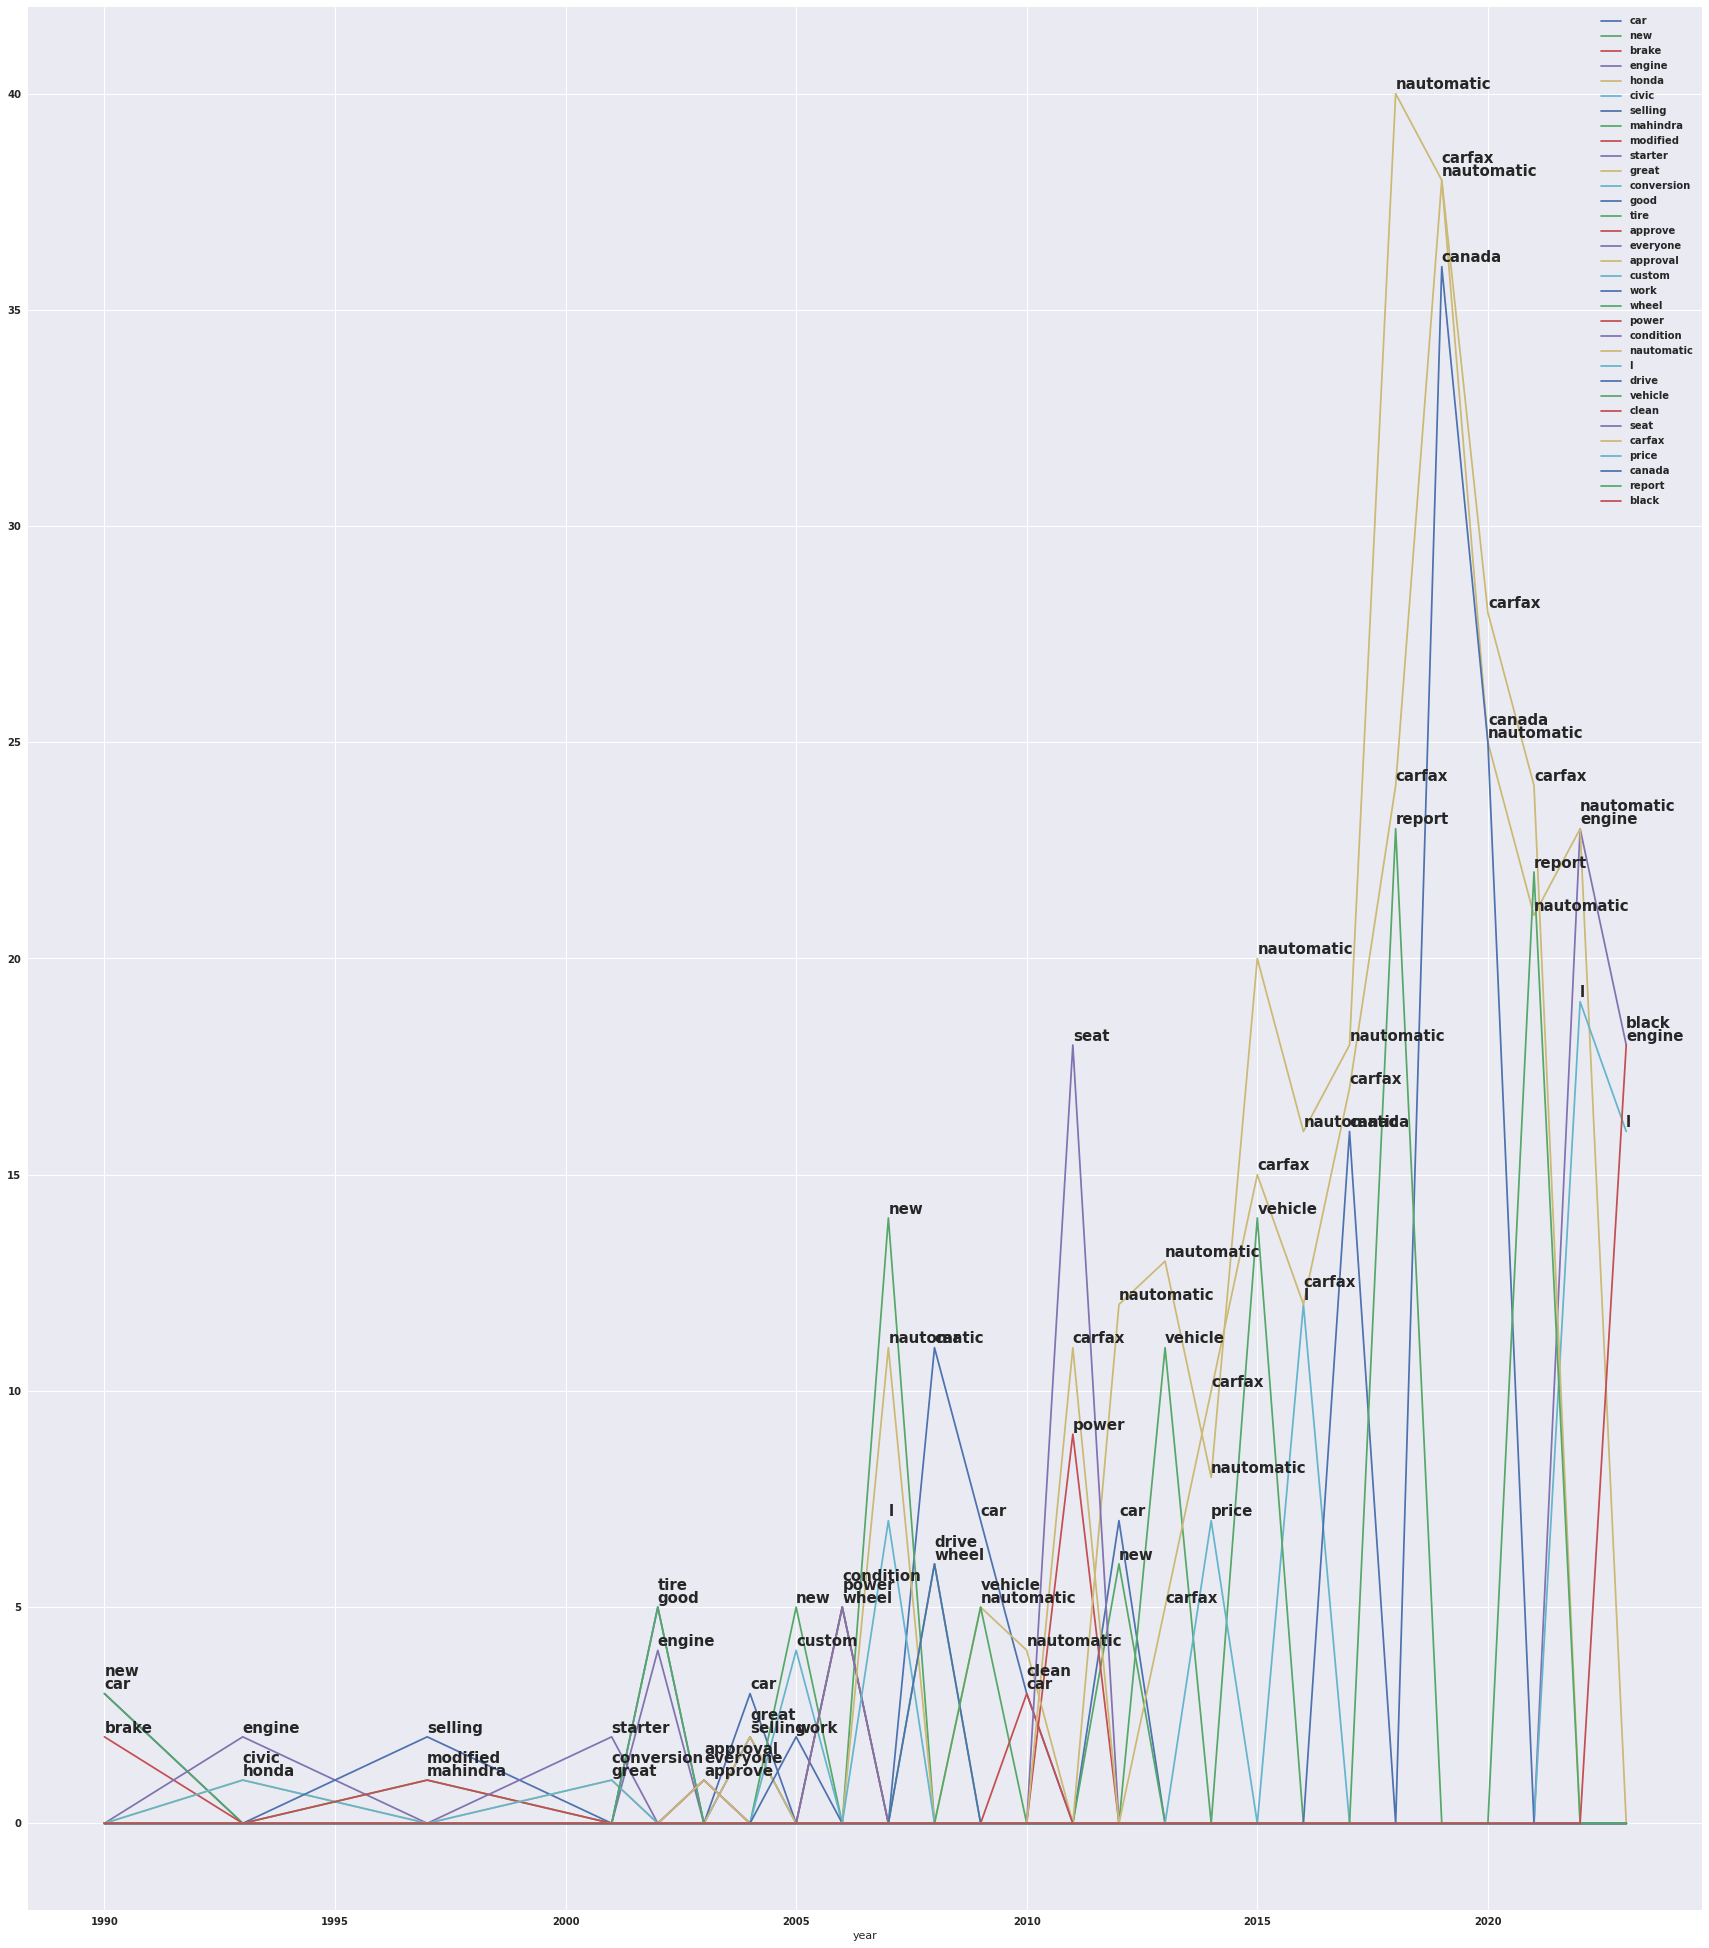

In [877]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


plt.rcParams["figure.figsize"] = (30,35)
df3.set_index('year').plot()

dic1= {}

for col in columList:
    for i in range(0,df3.shape[0]):
            if df3[col][i] > 0:

                if (df3['year'][i],df3[col][i]) not in dic1:
                    dic1[(df3['year'][i],df3[col][i])] = 1
                    plt.text(df3['year'][i],df3[col][i]+0.1,col)
                else:
                    dic1[(df3['year'][i],df3[col][i])] +=1
                    pos = dic1[(df3['year'][i],df3[col][i])]
                    plt.text(df3['year'][i],df3[col][i]+0.2*pos,col)
                    

# for j in range(1,df3.shape[1]):
#     for i in range(0,df3.shape[0]):
#         if df3.iloc[i,j] > 0:
#             plt.text(df3['year'][j],df3[i,j]+10,'h')
        